In [23]:
#Basic Imports
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import  RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_stata('data/ANESTimeSeriesStudy2016.dta')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 4270
Columns: 1200 entries, version to I_MARITAL
dtypes: category(1182), float64(6), int16(1), int32(1), int8(7), object(3)
memory usage: 5.8+ MB


In [4]:
df['V162058X'].value_counts()

Democratic Presidential candidate: voted for candidate      1290
Republican Presidential candidate: voted for candidate      1178
No post-election interview                                   536
Inapplicable                                                 515
Republican Presidential candidate: preference (nonvoter)     219
Democratic Presidential candidate: preference (nonvoter)     219
Other Presidential candidate: voted for candidate            185
No post data, incomplete IW                                   86
Other Presidential candidate: preference (nonvoter)           43
Name: V162058X, dtype: int64

In [5]:
df['V162058X'].value_counts().index[2:9]

CategoricalIndex(['No post-election interview', 'Inapplicable',
                  'Republican Presidential candidate: preference (nonvoter)',
                  'Democratic Presidential candidate: preference (nonvoter)',
                  'Other Presidential candidate: voted for candidate',
                  'No post data, incomplete IW',
                  'Other Presidential candidate: preference (nonvoter)'],
                 categories=['No post data, incomplete IW', 'No post-election interview', 'Inapplicable', 'Democratic Presidential candidate: voted for candidate', 'Republican Presidential candidate: voted for candidate', 'Other Presidential candidate: voted for candidate', 'Democratic Presidential candidate: preference (nonvoter)', 'Republican Presidential candidate: preference (nonvoter)', ...], ordered=True, dtype='category')

In [6]:
drop = ['No post data, incomplete IW',
                  'Other Presidential candidate: preference (nonvoter)',
                  'Republican Presidential candidate: preference (nonvoter)',
                  'Democratic Presidential candidate: preference (nonvoter)',
                  'Other Presidential candidate: voted for candidate',
                  'Inapplicable', 'No post-election interview']

In [7]:
df.drop(df[df['V162058X'] == drop[0]].index, inplace = True)
df.drop(df[df['V162058X'] == drop[1]].index, inplace = True)
df.drop(df[df['V162058X'] == drop[2]].index, inplace = True)
df.drop(df[df['V162058X'] == drop[3]].index, inplace = True)
df.drop(df[df['V162058X'] == drop[4]].index, inplace = True)
df.drop(df[df['V162058X'] == drop[5]].index, inplace = True)
df.drop(df[df['V162058X'] == drop[6]].index, inplace = True)

In [8]:
df['V162058X'].value_counts()

Democratic Presidential candidate: voted for candidate      1290
Republican Presidential candidate: voted for candidate      1178
Other Presidential candidate: preference (nonvoter)            0
Republican Presidential candidate: preference (nonvoter)       0
Democratic Presidential candidate: preference (nonvoter)       0
Other Presidential candidate: voted for candidate              0
Inapplicable                                                   0
No post-election interview                                     0
No post data, incomplete IW                                    0
Name: V162058X, dtype: int64

In [9]:
df['V162058X']

0       Republican Presidential candidate: voted for c...
1       Republican Presidential candidate: voted for c...
5       Republican Presidential candidate: voted for c...
6       Democratic Presidential candidate: voted for c...
7       Republican Presidential candidate: voted for c...
                              ...                        
4264    Republican Presidential candidate: voted for c...
4265    Democratic Presidential candidate: voted for c...
4266    Democratic Presidential candidate: voted for c...
4267    Republican Presidential candidate: voted for c...
4269    Democratic Presidential candidate: voted for c...
Name: V162058X, Length: 2468, dtype: category
Categories (9, object): ['No post data, incomplete IW' < 'No post-election interview' < 'Inapplicable' < 'Democratic Presidential candidate: voted for ... ... 'Other Presidential candidate: voted for candi... < 'Democratic Presidential candidate: preference... < 'Republican Presidential candidate: preference... < '

In [15]:
y = df['V162058X']
X= df[["V160001", "V160101", "V160101F", "V160101W", "V160102", "V160102F", "V160102W"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree

In [18]:
data_train, data_test, target_train, target_test = train_test_split(X, y, random_state=42)

In [19]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=5)

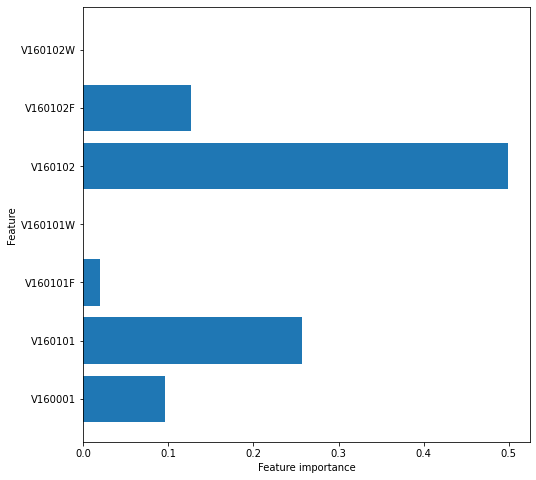

In [32]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [28]:
pred = tree_clf.predict(data_test)
print(classification_report(target_test, pred))

                                                        precision    recall  f1-score   support

Democratic Presidential candidate: voted for candidate       0.55      0.78      0.64       329
Republican Presidential candidate: voted for candidate       0.51      0.27      0.35       288

                                              accuracy                           0.54       617
                                             macro avg       0.53      0.52      0.50       617
                                          weighted avg       0.53      0.54      0.51       617



# Random Forest

In [29]:
forest = RandomForestClassifier(n_estimators=50, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

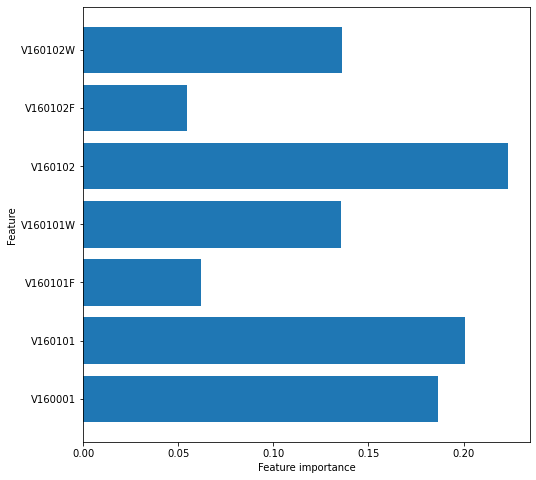

In [30]:
plot_feature_importances(forest)